In [1]:
#大作业

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('item-2018-06-01-2018-07-05的副本.csv')#导入数据，用sample()方法随机抽取5个样本数据预览。
df.sample(5)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
259339,2018/6/2,A021,2,97648,109173,1.0,2.5,2.5,n,0.0
229175,2018/6/6,D007,3,255560,1938,1.0,2.2,2.2,n,0.0
197306,2018/6/3,D005,2,206159,170383,1.0,12.3,12.3,n,0.0
100263,2018/6/2,A018,1,199638,21689,1.0,11.9,16.8,p,-4.9
1038431,2018/6/24,A021,4,51506,4567,1.0,4.1,4.1,n,0.0


In [3]:
df.info()#用Info()方法查看各字段数据类型.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SDATE            1048575 non-null  object 
 1   STORE_CODE       1048575 non-null  object 
 2   POSID            1048575 non-null  int64  
 3   BASK_CODE        1048575 non-null  int64  
 4   PROD_CODE        1048575 non-null  int64  
 5   ITEM_QUANTITY    1048575 non-null  float64
 6   ITEM_SPEND       1048575 non-null  float64
 7   NORMAL_PRICE     1048575 non-null  float64
 8   DISCOUNT_TYPE    1048575 non-null  object 
 9   DISCOUNT_AMOUNT  1048575 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 80.0+ MB


In [4]:
df = df.drop_duplicates()#删除重复数据

In [5]:
df.isnull().any()#是否存在缺失值
print(df.isnull().any())

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


In [6]:
df['ITEM_QUANTITY'].describe()

count    919798.000000
mean          1.530732
std           8.792848
min        -120.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        4020.000000
Name: ITEM_QUANTITY, dtype: float64

In [7]:
df['ITEM_SPEND'].describe()

count    919798.000000
mean         14.442620
std         116.100263
min        -870.000000
25%           4.000000
50%           7.900000
75%          12.900000
max       69120.000000
Name: ITEM_SPEND, dtype: float64

In [8]:
df['NORMAL_PRICE'].describe()

count    919798.000000
mean         15.748373
std          25.560155
min           0.500000
25%           4.000000
50%           8.700000
75%          16.800000
max        1980.000000
Name: NORMAL_PRICE, dtype: float64

In [9]:
df['DISCOUNT_AMOUNT'].describe()

count    919798.000000
mean         -2.078002
std          67.577646
min      -57600.000000
25%          -1.600000
50%           0.000000
75%           0.000000
max         696.000000
Name: DISCOUNT_AMOUNT, dtype: float64

In [10]:
df[[
      'ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'
      ]].corr()

,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
ITEM_QUANTITY,1.000000,0.357062,-0.020150,-0.150620
ITEM_SPEND,0.357062,1.000000,0.242920,-0.817664
NORMAL_PRICE,-0.020150,0.242920,1.000000,-0.078726
DISCOUNT_AMOUNT,-0.150620,-0.817664,-0.078726,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


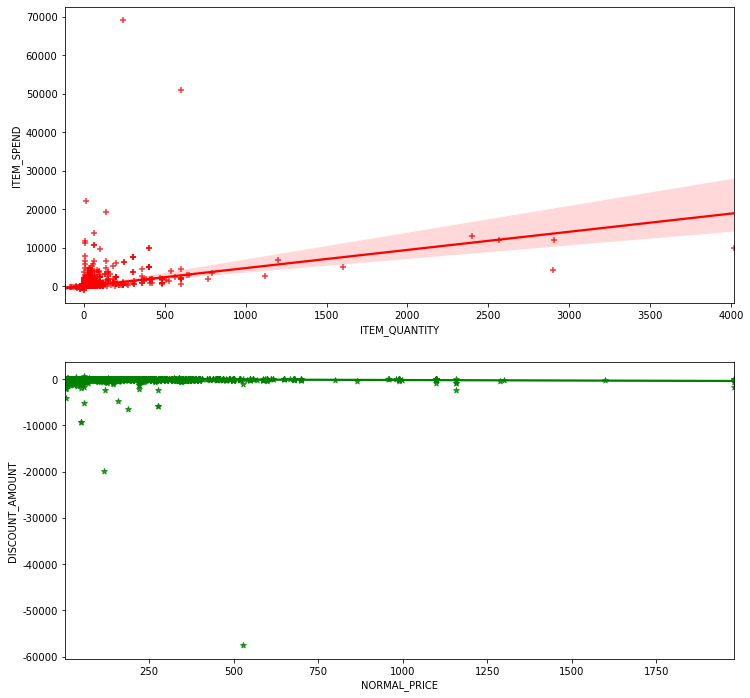

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题
fig,axes=plt.subplots(2,1,figsize=(12,12))
sns.regplot(x='ITEM_QUANTITY',y='ITEM_SPEND',data=df,color='r',marker='+',ax=axes[0])
sns.regplot(x='NORMAL_PRICE',y='DISCOUNT_AMOUNT',data=df,color='g',marker='*',ax=axes[1])

In [43]:
from pyecharts.globals import CurrentConfig, NotebookType  
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [44]:
import pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.globals import ThemeType  #引入主题

In [61]:
df1 = df.groupby('STORE_CODE')['STORE_CODE'].count() #按日期分组，对店铺名称计数
df1 = df1.sort_values(ascending=False) #降序

In [62]:
regions = df1.index.to_list()
values = df1.to_list()
c = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
        .add("", list(zip(regions,values)))
        .set_global_opts(title_opts=opts.TitleOpts(title="光顾便利店分布",subtitle="数据来源：item-2018-06-01-2018-07-05的副本",pos_top="-1%",pos_left = 'center'))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%",font_size=18))
    )
c.load_javascript() ;

In [63]:
c.render_notebook()

In [68]:
df2 = df.groupby('STORE_CODE')['ITEM_SPEND'].count()
df2 = df2.sort_values(ascending=False)[-10:]
df2 = df2.round(2)
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(df2.index.to_list())
    .add_yaxis("",df2.to_list()).reversal_axis() #X轴与y轴调换顺序
    .set_global_opts(title_opts=opts.TitleOpts(title="便利店销量top10",subtitle="数据来源：item-2018-06-01-2018-07-05的副本",pos_left = 'center'),
                       xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16)), #更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16)), #更改纵坐标字体大小
                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='right'))
    )
c.render_notebook()